# Import necessary libraries

In [37]:
# do
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%matplotlib inline
from numpy.fft import fft, fftshift, fftfreq, ifft, ifftshift
pi = np.pi

# Task 1: 1D Fourier Transform

Define a function $2\cos(2\pi f_1n) + 3\cos(2\pi f_2n)$

In [38]:
# Here, 
# f1 = 0.3 cycles per sample
# f2 = 0.2 cycles per sample
# n = 0 to N-1
# N = 100


N = 100
n_cycles_1 = 30
n_cycles_2 = 20

f1 = n_cycles_1/N
f2 = n_cycles_2/N

n = np.arange(N)


x = 2*np.cos(2*pi*f1*n) + 3*np.cos(2*pi*f2*n)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, 'Magnitude of X [normalized]')

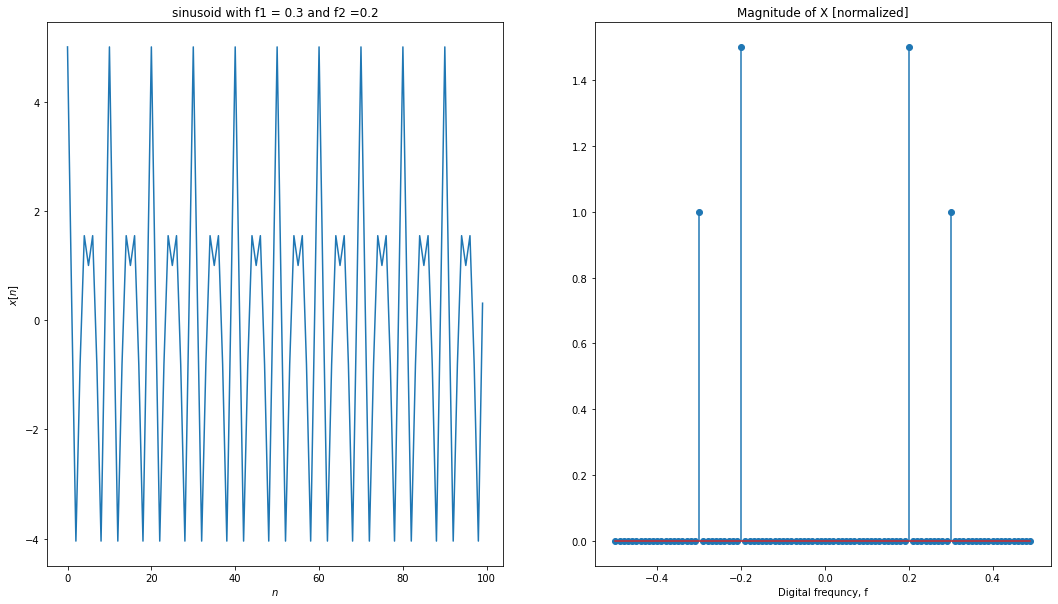

In [39]:
# perform the fourier transform of the signal
# plot the signal and it's fourier magnitude spectrum side by side

X = fft(x)
X = fftshift(X)
X = X/N 
    
fk = fftfreq(N)
fk = fftshift(fk)


fig = plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"sinusoid with f1 = {f1} and f2 ={f2}")

plt.subplot(1, 2, 2)
plt.stem(fk, np.abs(X))
plt.xlabel("Digital frequncy, f")
plt.title("Magnitude of X [normalized]")

# Task 2: IFFT

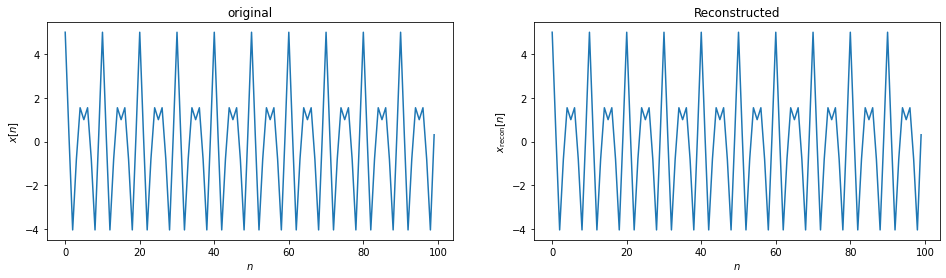

In [40]:
# performt the inverse fourier transform of X
# plot the original signal and the recosntructed signal side by side
x_recon = ifftshift(X)
x_recon = ifft(x_recon)
x_recon = np.real(x_recon)*N

n_recon = np.arange(N)
if x_recon.shape[0] > N:
  x_recon = x_recon[:N]


fig = plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"original")

plt.subplot(1, 2, 2)
plt.plot(n_recon, x_recon)
plt.xlabel("$n$")
plt.ylabel("$x_{\mathrm{recon}}[n]$")
plt.title("Reconstructed")
plt.show()

# Task 3: Changing resolution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, 'Magnitude of X [normalized] high resolution')

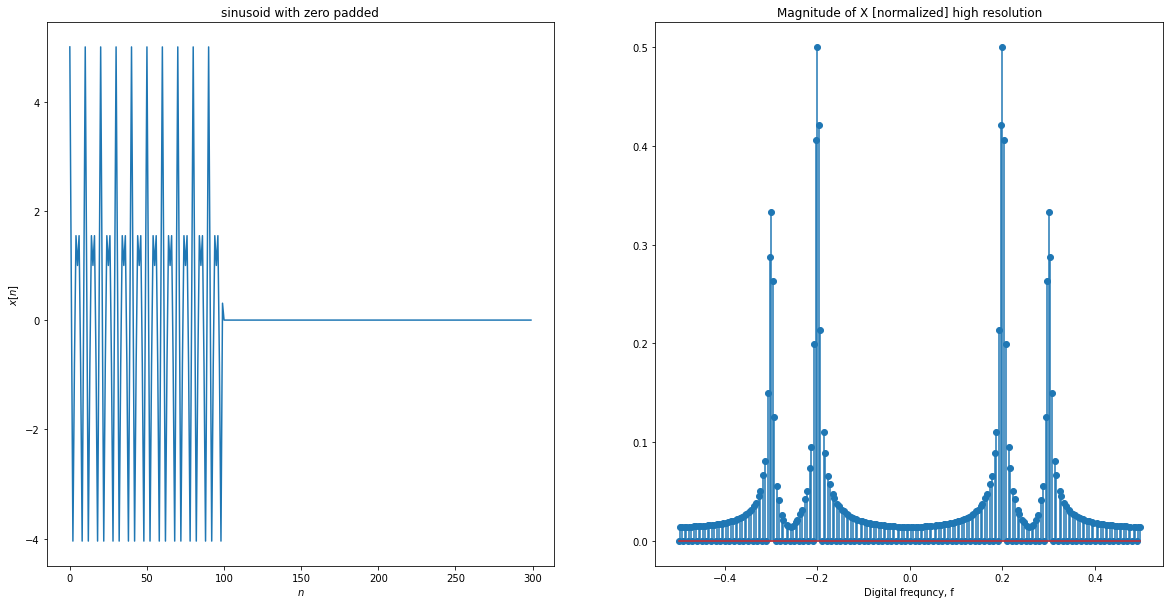

In [41]:
# perform fourier transform of x again, but this time triple the frequency resolution
# plot the signal and it's fourier magnitude spectrum side by side

N_zeros = 200

x_padded = np.concatenate([x, np.zeros(N_zeros)])
n_zero_padded = np.concatenate([n, np.arange(N, N+N_zeros)])



X_high_res= fft(x_padded)
X_high_res = fftshift(X_high_res)
X_high_res = X_high_res/(N+N_zeros)
    
fk = fftfreq(N+N_zeros)
fk = fftshift(fk)



fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(n_zero_padded, x_padded)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"sinusoid with zero padded")

plt.subplot(1, 2, 2)
plt.stem(fk, np.abs(X_high_res))
plt.xlabel("Digital frequncy, f")
plt.title("Magnitude of X [normalized] high resolution")